# 

# Image Classification using Multi Layer Perceptron And  Convolutional Neural Network for the cifar10 Dataset

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Loading the dataset


In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

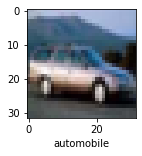

In [11]:
plot_sample(X_train, y_train, 4)

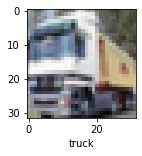

In [12]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

# Normalizing the training data

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Single Layer perceptron for image classification 

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9452 - accuracy: 0.3055
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8408 - accuracy: 0.3517
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8163 - accuracy: 0.3641
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7954 - accuracy: 0.3731
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7834 - accuracy: 0.3793
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7744 - accuracy: 0.3840
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7656 - accuracy: 0.3857: 0s - loss: 1.7653 - accuracy: 0.38
Epoch 8/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7567 - accuracy: 0.3911
Epoch 9/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7509 - accuracy: 0.3914: 1s - loss: 1.7391 - ac
Epoch 10/10
1563/1563 

# Multilayer Perceptron for image classification

In [28]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 94s 60ms/step - loss: nan - accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 93s 60ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 100s 64ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 94s 60ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 87s 56ms/step - loss: nan - accuracy: 0.1000


We can see that at the end of 5 epochs, accuracy is at around 10%


# Convolutional neural network to train our images

In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4497 - accuracy: 0.4808
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1083 - accuracy: 0.6099
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9652 - accuracy: 0.6626
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8790 - accuracy: 0.6939
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8102 - accuracy: 0.7180
Epoch 6/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.7537 - accuracy: 0.7377
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7016 - accuracy: 0.7553
Epoch 8/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6572 - accuracy: 0.7711
Epoch 9/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6193 - accuracy: 0.7841
Epoch 10/10
1563/1563 [==============================] - 34s 22m

# With CNN, at the end 10 epochs, accuracy was at 80% which is a significant improvement over ANN. CNN's are best for image classification and gives more accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [24]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9289 - accuracy: 0.6992


[0.9288610219955444, 0.6991999745368958]

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.7470073e-02, 3.9148033e-03, 5.3888291e-02, 9.9625146e-01,
        1.7496347e-03, 9.3855047e-01, 6.7189491e-01, 5.1077008e-03,
        7.6904398e-01, 5.1965982e-01],
       [9.0654480e-01, 9.9967158e-01, 6.7752600e-04, 7.5225800e-02,
        3.3173543e-05, 5.7494640e-04, 6.8874127e-05, 7.3974559e-05,
        9.9992800e-01, 9.0504140e-01],
       [6.9067144e-01, 9.8632723e-01, 6.1923563e-03, 5.4796028e-01,
        2.0572543e-04, 1.1486232e-02, 4.5364499e-03, 4.0185809e-02,
        9.8875940e-01, 9.0010989e-01],
       [9.7134554e-01, 8.9043069e-01, 6.9998443e-02, 2.1667886e-01,
        1.5295237e-02, 1.4735162e-03, 6.1624944e-03, 7.1006715e-03,
        9.9494600e-01, 2.7806619e-01],
       [2.9118925e-02, 6.1491817e-02, 9.2966735e-01, 9.6277082e-01,
        9.9400377e-01, 4.6179703e-01, 9.8537511e-01, 2.3815006e-02,
        1.4511585e-02, 7.2000623e-03]], dtype=float32)

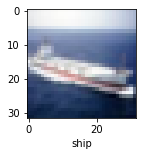

In [34]:
plot_sample(X_test, y_test,54)